from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from IPython.core.display import HTML, display
from urllib.request import Request, urlopen


%matplotlib inline

In [14]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
%matplotlib inline

In [2]:
#this is to read the file
counties = gpd.read_file('smile-on-black_panther/TN-47-tennessee-counties.json')

In [3]:
#did this to check out my file
counties.head(3)

,id,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,None,47,003,01639723,0500000US47003,47003,Bedford,06,1226717421,2983130,"POLYGON ((-86.63855 35.68695, -86.54313 35.698..."
1,None,47,119,01639772,0500000US47119,47119,Maury,06,1588021146,6319196,"POLYGON ((-87.33831 35.65954, -87.25526 35.700..."
2,None,47,177,01639796,0500000US47177,47177,Warren,06,1120635693,3508325,"POLYGON ((-85.88579 35.83899, -85.86812 35.845..."


In [4]:
#code did have a crs
print(counties.crs)

None


In [5]:
#Tried to give it a crs but it didnt do much
counties.set_crs(epsg=4326, inplace=True)

,id,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,None,47,003,01639723,0500000US47003,47003,Bedford,06,1226717421,2983130,"POLYGON ((-86.63855 35.68695, -86.54313 35.698..."
1,None,47,119,01639772,0500000US47119,47119,Maury,06,1588021146,6319196,"POLYGON ((-87.33831 35.65954, -87.25526 35.700..."
2,None,47,177,01639796,0500000US47177,47177,Warren,06,1120635693,3508325,"POLYGON ((-85.88579 35.83899, -85.86812 35.845..."
3,None,47,147,01639786,0500000US47147,47147,Robertson,06,1233581423,451691,"POLYGON ((-87.11566 36.64403, -87.06088 36.645..."
4,None,47,067,01648577,0500000US47067,47067,Hancock,06,575820509,2984310,"POLYGON ((-83.47199 36.59917, -83.27585 36.597..."
...,...,...,...,...,...,...,...,...,...,...,...
90,None,47,011,01639727,0500000US47011,47011,Bradley,06,851489149,6959141,"POLYGON ((-84.94572 35.28817, -84.92805 35.289..."
91,None,47,125,01639777,0500000US47125,47125,Montgomery,06,1396435233,12076781,"POLYGON ((-87.64047 36.63780, -87.34714 36.641..."
92,None,47,161,01639792,0500000US47161,47161,Stewart,06,1189665041,87232349,"POLYGON ((-88.07164 36.67768, -88.01156 36.676..."
93,None,47,025,01639733,0500000US47025,47025,Claiborne,06,1125572374,18099460,"POLYGON ((-83.98797 36.58920, -83.92966 36.587..."


locations['lon'] = locations.geometry.apply(lambda p: p.x)
locations['lat'] = locations.geometry.apply(lambda p: p.y)
locations.head()

locations = gpd.GeoDataFrame(locations, 
                           crs = stat_counties.crs, 
                           geometry = clinic_loc['geometry'])

locations.set_crs(epsg=4326, inplace=True)

In [6]:
#read in a new csv for the data we worked with
locations = pd.read_csv('smile-on-black_panther/clinic_loc_geo.csv')

In [7]:
#checked out the data in it
locations.head(3)

,location_number,Facility,Address,Zip,City,full_address,geometry
0,1,Matthew Walker Comprehensive Health Center Inc...,1035 14th Ave N,37208,Nashville,"1035 14th Ave N, Nashville, TN 37208",POINT (-86.80084302487185 36.17025203391616)
1,2,Friends in Need Health Center - Kingsport,1105 W Stone Dr # 5,37660,Kingsport,"1105 W Stone Dr # 5, Kingsport, TN 37660",POINT (-82.57384074423052 36.5585389343394)
2,3,Christ Community Health Services- Frayser,969 Frayser Blvd,38127,Memphis,"969 Frayser Blvd, Memphis, TN 38127",POINT (-90.0314368977358 35.2171344409435)


In [8]:
#droped the Geometry column to add in a new one
locations = locations.drop('geometry', axis = 1)


In [9]:
#geometry is gone, Yes!!!
locations.head(2)

,location_number,Facility,Address,Zip,City,full_address
0,1,Matthew Walker Comprehensive Health Center Inc...,1035 14th Ave N,37208,Nashville,"1035 14th Ave N, Nashville, TN 37208"
1,2,Friends in Need Health Center - Kingsport,1105 W Stone Dr # 5,37660,Kingsport,"1105 W Stone Dr # 5, Kingsport, TN 37660"


In [10]:
# created a variable for the address
addr_col = pd.DataFrame()

In [11]:
#now im putting the address in there
addr_col = locations['full_address']
addr_col.head()

0        1035 14th Ave N, Nashville, TN 37208
1    1105 W Stone Dr # 5, Kingsport, TN 37660
2         969 Frayser Blvd, Memphis, TN 38127
3            217 E High St, Lebanon, TN 37087
4     3481 Austin Peay Hwy, Memphis, TN 38128
Name: full_address, dtype: object

In [12]:
#running a function to get the lat long info and making my data geo points 
def street_conv(addr):
    #print(addr)
    geolocator = Nominatim(user_agent="my_application")
    location = geolocator.geocode(addr)
    if location == None:
        #print('if')
        return None
    else:
        #print('else')
        return Point(location.longitude, location.latitude)



In [15]:
#putting it all together 
addresses = addr_col.apply(street_conv)
locations['geometry'] = addresses

In [16]:
locations.head(2)

,location_number,Facility,Address,Zip,City,full_address,geometry
0,1,Matthew Walker Comprehensive Health Center Inc...,1035 14th Ave N,37208,Nashville,"1035 14th Ave N, Nashville, TN 37208",POINT (-86.8043193 36.175844)
1,2,Friends in Need Health Center - Kingsport,1105 W Stone Dr # 5,37660,Kingsport,"1105 W Stone Dr # 5, Kingsport, TN 37660",POINT (-82.5614554 36.5597781)


In [17]:
#checking if its there
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   location_number  31 non-null     int64 
 1   Facility         31 non-null     object
 2   Address          31 non-null     object
 3   Zip              31 non-null     int64 
 4   City             31 non-null     object
 5   full_address     31 non-null     object
 6   geometry         31 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.8+ KB


In [18]:
#giving it a shape
locations = gpd.GeoDataFrame(locations, geometry='geometry')

In [19]:
#it has it too
locations.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   location_number  31 non-null     int64   
 1   Facility         31 non-null     object  
 2   Address          31 non-null     object  
 3   Zip              31 non-null     int64   
 4   City             31 non-null     object  
 5   full_address     31 non-null     object  
 6   geometry         31 non-null     geometry
dtypes: geometry(1), int64(2), object(4)
memory usage: 1.8+ KB


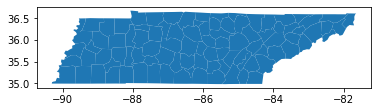

In [20]:
#plotting my counties there all there
counties.plot();

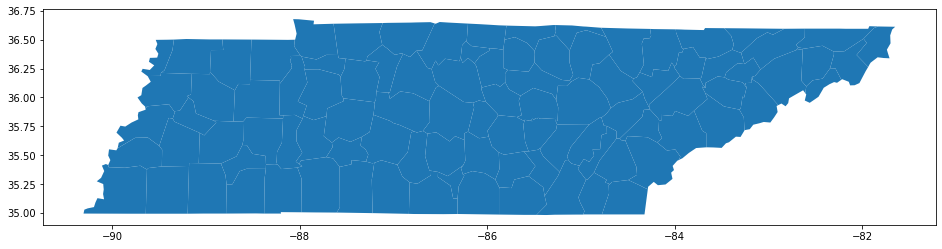

In [21]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(ax = ax);

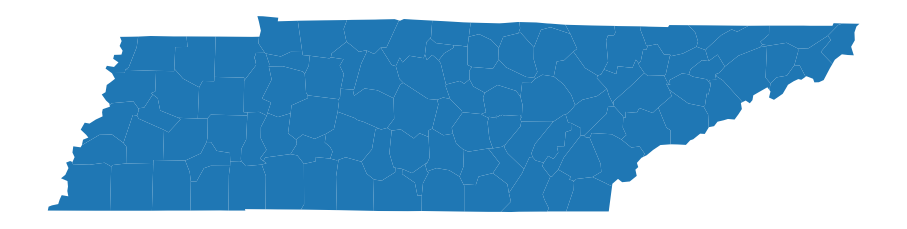

In [22]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(ax = ax)
ax.axis('off');

In [23]:
poverty = pd.read_csv('pop_poverty.csv')

In [24]:
#brought in the poverty info
poverty.head(5)

,Unnamed: 0,NAME,population,FIPStxt,Stabr,POVALL_2018,PCTPOVALL_2018
0,0,Anderson County,"76,978",47001,TN,"12,433",16.5
1,1,Bedford County,"49,713",47003,TN,"6,955",14.4
2,2,Benton County,"16,160",47005,TN,"3,068",19.2
3,3,Bledsoe County,"15,064",47007,TN,"3,235",26.7
4,4,Blount County,"133,088",47009,TN,"12,816",9.9


In [25]:
#brought in a shape for each county with patients 
pts = pd.read_csv('pts_by_county.csv')

In [26]:
pts.head(3)

,County,geometry,patients
0,Anderson,"POLYGON ((2539671.281432647 623750.6567582965,...",17
1,Bedford,"POLYGON ((1811870.605147154 372240.9389782044,...",115
2,Benton,"POLYGON ((1393612.689696146 700920.9207245363,...",11


In [27]:
pts = pts.drop(['geometry'], axis=1)

In [28]:
pts.head(2)

,County,patients
0,Anderson,17
1,Bedford,115


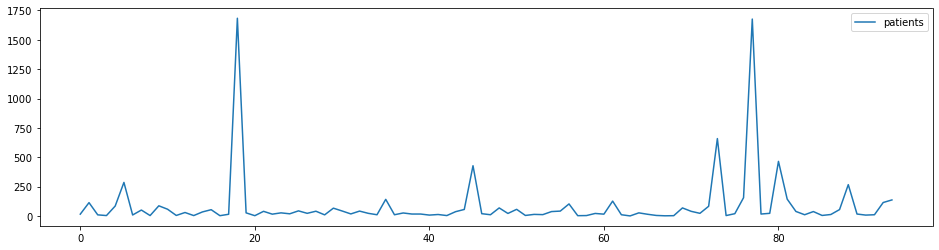

In [29]:
fig, ax = plt.subplots(figsize=(16,4))
pts.plot(ax = ax)
ax.axis = pts['County'];

In [30]:
#merged the pts and counties to get the geometry with the county name
counties = pd.merge(left = pts, right = counties,
                         left_on = 'County', right_on = 'NAME')     

counties.head(3)



,County,patients,id,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,Anderson,17,None,47,001,01639722,0500000US47001,47001,Anderson,06,873246897,19770493,"POLYGON ((-84.44034 36.16300, -84.40323 36.174..."
1,Bedford,115,None,47,003,01639723,0500000US47003,47003,Bedford,06,1226717421,2983130,"POLYGON ((-86.63855 35.68695, -86.54313 35.698..."
2,Benton,11,None,47,005,01639724,0500000US47005,47005,Benton,06,1021240555,108591318,"POLYGON ((-88.21300 36.11938, -88.08577 36.253..."


In [34]:
counties.head(2)

,County,patients,id,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,Anderson,17,None,47,001,01639722,0500000US47001,47001,Anderson,06,873246897,19770493,"POLYGON ((-84.44034 36.16300, -84.40323 36.174..."
1,Bedford,115,None,47,003,01639723,0500000US47003,47003,Bedford,06,1226717421,2983130,"POLYGON ((-86.63855 35.68695, -86.54313 35.698..."


In [35]:
#gave it a geoDataFrame after the merge 
counties = gpd.GeoDataFrame(counties)

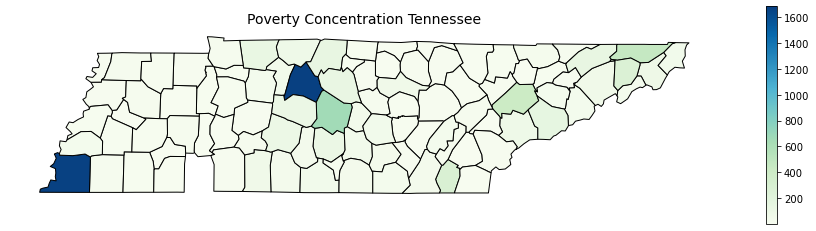

In [36]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'patients',
             cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Poverty Concentration Tennessee', fontsize = 14)
ax.axis('off');



# ok so one county didnt have anyone in poverty so its a blank 

locations = GeoDataFrame(locations)

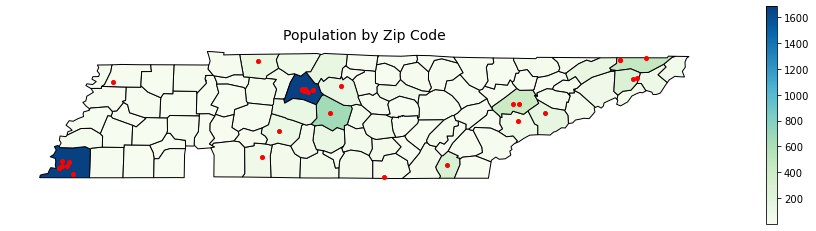

In [37]:
#ran the map with the poverty leverls and all of the facilities it looks great 
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'patients', 
             cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
locations.plot(ax=ax,color='red', markersize=16) #to show points on choropleth map
plt.title('Population by Zip Code', fontsize = 14)
ax.axis('off');

# fig, ax = plt.subplots(figsize=(16,4))
# counties.plot(column = 'patients',
#              cmap = 'GnBu', 
#               edgecolor = 'black', 
#               legend = True,
#               ax = ax)
# plt.title('Poverty Concentration Tennessee', fontsize = 14)
# ax.axis('off');
